In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import the combined dataset
df_combined = pd.read_csv('combined_data.csv')

In [3]:
df_combined.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


## Date time

In [4]:
# Extract the minutes from the CRSDepTime column
minutes = df_combined.CRSDepTime.astype(str).str[-2:]
minutes

0           45
1           53
2           15
3           55
4           32
            ..
14595132    05
14595133    51
14595134    25
14595135    15
14595136    00
Name: CRSDepTime, Length: 14595137, dtype: object

In [5]:
# Extract the hours from the CESDepTime column
hours = df_combined.CRSDepTime.astype(str).str[:-2]
hours

0            7
1           10
2           19
3           17
4            8
            ..
14595132    16
14595133    18
14595134    10
14595135    13
14595136    18
Name: CRSDepTime, Length: 14595137, dtype: object

In [6]:
# Convert the DayOfMonth column into string
day = df_combined.DayofMonth.astype(str)

# Tranform single digit hour values such as "7" to double digit such as "07"
day = day.apply(lambda x: '{0:0>2}'.format(x))

In [7]:
# Convert the hours extracted into string
hours = hours.astype(str)

# Tranform single digit hour values such as "7" to double digit such as "07"
hours = hours.apply(lambda x: '{0:0>2}'.format(x))

In [8]:
# Convert the Month column into a string
month = df_combined.Month.astype(str)

# Tranform single digit hour values such as "7" to double digit such as "07"
month = month.apply(lambda x: '{0:0>2}'.format(x))

In [9]:
# Check whether each function has been assigned 
day.value_counts()

26    488517
19    487481
12    486070
20    485255
05    484381
16    483693
13    483255
09    482763
06    482099
27    481992
21    481949
17    480650
15    480351
14    480049
18    479872
07    479808
08    479417
10    479251
02    478711
11    477833
28    476092
01    475988
22    475719
23    474539
25    474527
03    472001
24    471815
04    471440
30    442419
29    438749
31    278451
Name: DayofMonth, dtype: int64

In [10]:
month.value_counts()

08    1282011
07    1269804
03    1244426
10    1241710
05    1234528
06    1227595
12    1218897
01    1202846
04    1199999
11    1191346
09    1185124
02    1096851
Name: Month, dtype: int64

In [11]:
hours.value_counts()

08    1011517
07    1003426
06    1001153
17     994366
11     958316
09     948540
13     936318
16     930008
10     922238
14     915541
12     915153
15     894568
18     876469
19     843944
20     584228
21     475199
22     179908
05      88984
23      83990
00      19240
01       8169
02       1888
04       1335
03        639
Name: CRSDepTime, dtype: int64

In [12]:
# Convert the dates and times into one column as a datetimeformat
df_combined["DateTimeCRSDepTime"] = pd.to_datetime(
    day + "/" + month + "/" + df_combined.Year.astype(str) + "," + hours + ":" + minutes, 
    format='%d/%m/%Y,%H:%M')

In [13]:
df_combined.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DateTimeCRSDepTime
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,13,0,NaN,0,0,0,0,0,0,2006-01-11 07:45:00
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,19,0,NaN,0,0,0,0,0,0,2006-01-11 10:53:00
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,11,0,NaN,0,0,0,0,0,0,2006-01-11 19:15:00
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,10,0,NaN,0,0,0,0,0,0,2006-01-11 17:55:00
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,12,0,NaN,0,0,0,0,0,0,2006-01-11 08:32:00


In [14]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595137 entries, 0 to 14595136
Data columns (total 30 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Year                int64         
 1   Month               int64         
 2   DayofMonth          int64         
 3   DayOfWeek           int64         
 4   DepTime             float64       
 5   CRSDepTime          int64         
 6   ArrTime             float64       
 7   CRSArrTime          int64         
 8   UniqueCarrier       object        
 9   FlightNum           int64         
 10  TailNum             object        
 11  ActualElapsedTime   float64       
 12  CRSElapsedTime      float64       
 13  AirTime             float64       
 14  ArrDelay            float64       
 15  DepDelay            float64       
 16  Origin              object        
 17  Dest                object        
 18  Distance            int64         
 19  TaxiIn              int64         
 20  

In [15]:
# Remove unnecessary columns
df_drop = df_combined.iloc[:, [10,14,15,16,17,29]]
df_drop

,TailNum,ArrDelay,DepDelay,Origin,Dest,DateTimeCRSDepTime
0,N657AW,6.0,-2.0,ATL,PHX,2006-01-11 07:45:00
1,N834AW,-5.0,0.0,ATL,PHX,2006-01-11 10:53:00
2,N605AW,-23.0,0.0,ATL,PHX,2006-01-11 19:15:00
3,N312AW,-8.0,-2.0,AUS,PHX,2006-01-11 17:55:00
4,N309AW,0.0,-8.0,AUS,PHX,2006-01-11 08:32:00
...,...,...,...,...,...,...
14595132,N670DN,13.0,-7.0,MCO,ATL,2007-12-15 16:05:00
14595133,N829MH,5.0,11.0,ATL,SLC,2007-12-15 18:51:00
14595134,N623DL,15.0,-1.0,LAX,ATL,2007-12-15 10:25:00
14595135,N970DL,36.0,38.0,DFW,ATL,2007-12-15 13:15:00


In [16]:
# Check if there are any null values
df_drop.isna().sum()

TailNum                   22
ArrDelay              316047
DepDelay              282682
Origin                     0
Dest                       0
DateTimeCRSDepTime         0
dtype: int64

In [17]:
# Remove missing values from the columns
df_final = df_drop.dropna(subset = ["TailNum","ArrDelay","DepDelay"])

In [18]:
# Sort the dataset by TailNum and then DateTimeCRSDepTime
df_final = df_final.sort_values(['TailNum', 'DateTimeCRSDepTime'])
df_final

,TailNum,ArrDelay,DepDelay,Origin,Dest,DateTimeCRSDepTime
503597,0,26.0,51.0,JFK,FLL,2006-01-01 19:45:00
424297,0,-1.0,0.0,CVG,CAK,2006-01-01 20:55:00
503990,0,770.0,51.0,JFK,FLL,2006-01-02 19:45:00
425159,0,95.0,100.0,CVG,RDU,2006-01-02 20:05:00
504383,0,45.0,76.0,JFK,FLL,2006-01-03 19:45:00
...,...,...,...,...,...,...
14516222,NHZOAL,1.0,2.0,KOA,HNL,2007-12-29 15:50:00
14516241,NHZOAL,22.0,39.0,OAK,KOA,2007-12-30 14:30:00
14516216,NHZOAL,39.0,53.0,KOA,OAK,2007-12-30 19:05:00
14516242,NHZOAL,45.0,30.0,OAK,KOA,2007-12-31 11:00:00


In [19]:
# Create a new column called CurrentDelay 
df_final['CurrentDelay'] = df_final['ArrDelay'] + df_final['DepDelay']

In [20]:
# Create a new column which shows the previous delay by lagging the rows by 1
df_final['PreviousDelay'] = df_final['CurrentDelay'].shift(1)
df_final

,TailNum,ArrDelay,DepDelay,Origin,Dest,DateTimeCRSDepTime,CurrentDelay,PreviousDelay
503597,0,26.0,51.0,JFK,FLL,2006-01-01 19:45:00,77.0,NaN
424297,0,-1.0,0.0,CVG,CAK,2006-01-01 20:55:00,-1.0,77.0
503990,0,770.0,51.0,JFK,FLL,2006-01-02 19:45:00,821.0,-1.0
425159,0,95.0,100.0,CVG,RDU,2006-01-02 20:05:00,195.0,821.0
504383,0,45.0,76.0,JFK,FLL,2006-01-03 19:45:00,121.0,195.0
...,...,...,...,...,...,...,...,...
14516222,NHZOAL,1.0,2.0,KOA,HNL,2007-12-29 15:50:00,3.0,37.0
14516241,NHZOAL,22.0,39.0,OAK,KOA,2007-12-30 14:30:00,61.0,3.0
14516216,NHZOAL,39.0,53.0,KOA,OAK,2007-12-30 19:05:00,92.0,61.0
14516242,NHZOAL,45.0,30.0,OAK,KOA,2007-12-31 11:00:00,75.0,92.0


## Scatter plot

Text(0.5, 1.0, 'Scatterplot showing delays in the previous flight vs delays in current flight')

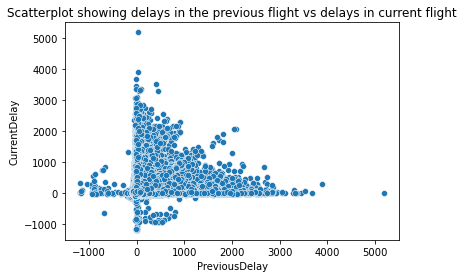

In [21]:
# Create a scatterplot to see if there is a relationship between delays in the previous airport and current airport 
g1 = sns.scatterplot(data = df_final, x = 'PreviousDelay', y = 'CurrentDelay')
g1.set_title('Scatterplot showing delays in the previous flight vs delays in current flight')

It is not possible to clearly say that there is a relationship since the points are all over the place. Further analysis is needed

## Create a crosstab with probabilities

In [22]:
# Assign 0s and 1s for TotalDelay and PreviousDelay. If Delay > 15 then value is changed to 1, else 0

df_final['CurrentDelay'] = np.where(df_final['CurrentDelay'] > 15, 1, 0)
df_final['PreviousDelay'] = np.where(df_final['PreviousDelay'] > 15, 1, 0)
df_final

,TailNum,ArrDelay,DepDelay,Origin,Dest,DateTimeCRSDepTime,CurrentDelay,PreviousDelay
503597,0,26.0,51.0,JFK,FLL,2006-01-01 19:45:00,1,0
424297,0,-1.0,0.0,CVG,CAK,2006-01-01 20:55:00,0,1
503990,0,770.0,51.0,JFK,FLL,2006-01-02 19:45:00,1,0
425159,0,95.0,100.0,CVG,RDU,2006-01-02 20:05:00,1,1
504383,0,45.0,76.0,JFK,FLL,2006-01-03 19:45:00,1,1
...,...,...,...,...,...,...,...,...
14516222,NHZOAL,1.0,2.0,KOA,HNL,2007-12-29 15:50:00,0,1
14516241,NHZOAL,22.0,39.0,OAK,KOA,2007-12-30 14:30:00,1,0
14516216,NHZOAL,39.0,53.0,KOA,OAK,2007-12-30 19:05:00,1,1
14516242,NHZOAL,45.0,30.0,OAK,KOA,2007-12-31 11:00:00,1,1


In [23]:
# Create a crosstab
crosstab = pd.crosstab(df_final.PreviousDelay, df_final.CurrentDelay)
crosstab

CurrentDelay,0,1
PreviousDelay,,
0,8373602,1745662
1,1745661,2414165


In [24]:
# Crosstab with probabilities of the events occuring
divisor = crosstab.sum(axis=1)
crosstab = crosstab.divide(divisor, axis=0)
crosstab

CurrentDelay,0,1
PreviousDelay,,
0,0.827491,0.172509
1,0.419648,0.580352


0.580 is the probability that there is a delay in the current airport given that there has been a delay in the previous airport

0.420 is the probability that there is no delay in the current airport given that there has been a delay in the previous airport

0.58 > 0.42 therefore the crosstab shows that cascading delays in the previous airport create delays in the current airport